<a href="https://colab.research.google.com/github/priyalpatel581/Statistics/blob/main/Sales_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [22]:
from google.colab import files
uploaded = files.upload()

Saving sales_data_case_study.csv to sales_data_case_study (1).csv


In [23]:
# Get the filename from the dictionary returned by files.upload()
filename = next(iter(uploaded))
df = pd.read_csv(filename)

In [24]:
print("Dataset Loaded. Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset Loaded. Shape: (1000, 7)

First 5 rows:


,Order_ID,Product_Category,Region,Sales,Quantity,Discount,Profit
0,1,Sports,West,779.87,6,0.29,25.66
1,2,Beauty,West,684.93,3,0.19,207.85
2,3,Home,West,511.93,8,0.24,7.30
3,4,Beauty,West,370.61,3,0.21,85.15
4,5,Beauty,West,639.64,2,0.18,76.92


 Data Cleaning

In [25]:
# Check missing values
print("\n📌 Missing Values:")
df.isnull().sum()


📌 Missing Values:


,0
Order_ID,0
Product_Category,0
Region,0
Sales,0
Quantity,0
Discount,0
Profit,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          1000 non-null   int64  
 1   Product_Category  1000 non-null   object 
 2   Region            1000 non-null   object 
 3   Sales             1000 non-null   float64
 4   Quantity          1000 non-null   int64  
 5   Discount          1000 non-null   float64
 6   Profit            1000 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


In [27]:
df.describe()

,Order_ID,Sales,Quantity,Discount,Profit
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,514.16736,4.986000,0.145930,104.563950
std,288.819436,199.49091,2.597027,0.086092,82.010446
min,1.000000,-88.08000,1.000000,0.000000,-65.280000
25%,250.750000,378.75500,3.000000,0.070000,44.267500
50%,500.500000,512.61500,5.000000,0.140000,94.095000
75%,750.250000,645.78000,7.000000,0.220000,149.472500
max,1000.000000,1138.62000,9.000000,0.300000,424.410000


In [30]:
# Frequency Tables
print("\n📊 Frequency Table of Product Category:")
print(df["Product_Category"].value_counts())

print("\n📊 Frequency Table of Region:")
print(df["Region"].value_counts())


📊 Frequency Table of Product Category:
Product_Category
Electronics    210
Sports         206
Beauty         204
Home           190
Clothing       190
Name: count, dtype: int64

📊 Frequency Table - Region:
Region
North    266
South    255
East     247
West     232
Name: count, dtype: int64



📊 Histograms:


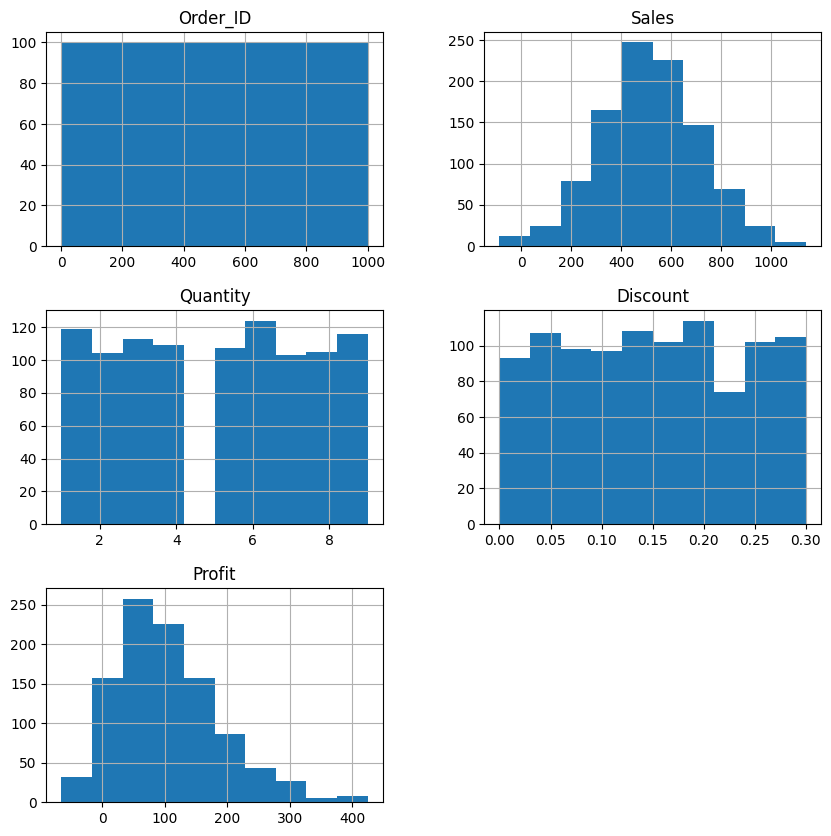

In [31]:
#  Histograms
print("\n📊 Histograms:")
df.hist(figsize=(10, 10))
plt.show()

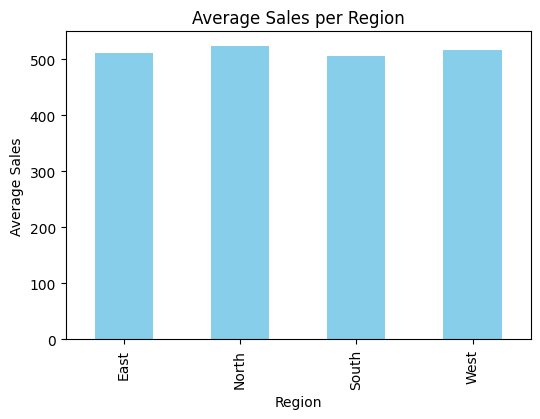

In [33]:
# Bar Graphs
region_sales = df.groupby("Region")["Sales"].mean()
region_sales.plot(kind="bar", figsize=(6,4), color="skyblue", title="Average Sales per Region")
plt.ylabel("Average Sales")
plt.show()

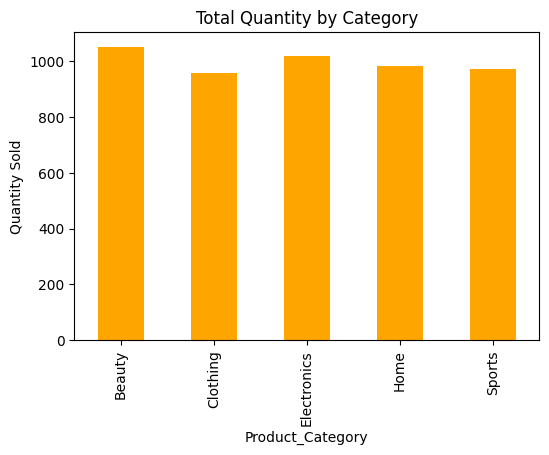

In [34]:
cat_qty = df.groupby("Product_Category")["Quantity"].sum()
cat_qty.plot(kind="bar", figsize=(6,4), color="orange", title="Total Quantity by Category")
plt.ylabel("Quantity Sold")
plt.show()

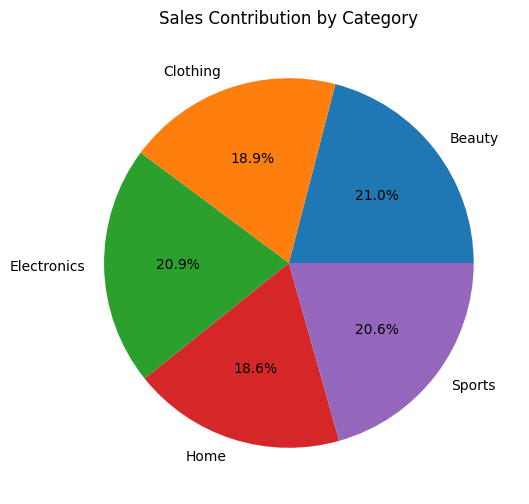

In [36]:
# Pie Charts
cat_sales = df.groupby("Product_Category")["Sales"].sum()
cat_sales.plot(kind="pie", autopct="%1.1f%%", figsize=(6,6), title="Sales Contribution by Category")
plt.ylabel("")
plt.show()

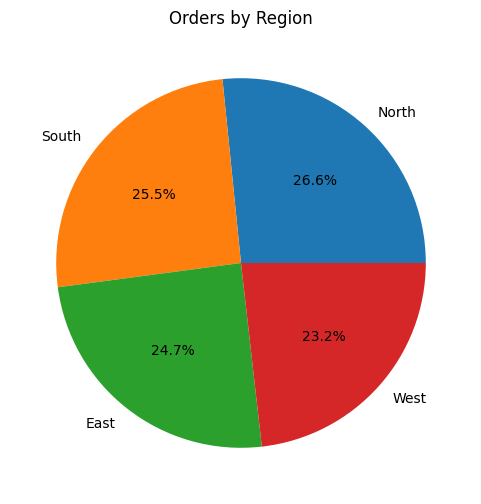

In [37]:
region_orders = df["Region"].value_counts()
region_orders.plot(kind="pie", autopct="%1.1f%%", figsize=(6,6), title="Orders by Region")
plt.ylabel("")
plt.show()

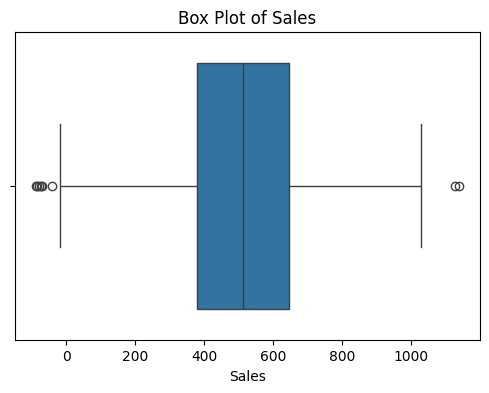

In [40]:
# Box Plots
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Sales"])
plt.title("Box Plot of Sales")
plt.show()

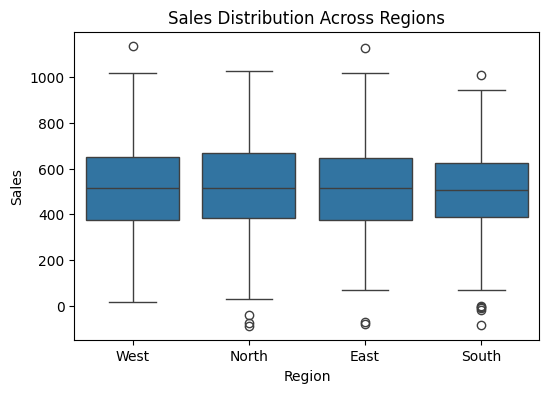

In [39]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Region", y="Sales", data=df)
plt.title("Sales Distribution Across Regions")
plt.show()

In [41]:
# Measures of Central Tendency
mean_sales = np.mean(df["Sales"])
median_sales = np.median(df["Sales"])
mode_sales = stats.mode(df["Sales"], keepdims=True)

print("\n📌 Central Tendency:")
print("Mean Sales:", round(mean_sales,2))
print("Median Sales:", round(median_sales,2))
print("Mode Sales:", mode_sales.mode[0], " (Count:", mode_sales.count[0], ")")

# Skewness & Kurtosis
print("Skewness (Sales):", round(stats.skew(df["Sales"]),2))
print("Kurtosis (Sales):", round(stats.kurtosis(df["Sales"]),2))


📌 Central Tendency:
Mean Sales: 514.17
Median Sales: 512.62
Mode Sales: 454.7  (Count: 2 )
Skewness (Sales): -0.05
Kurtosis (Sales): 0.05


In [42]:
# Variation & Range
range_sales = np.ptp(df["Sales"])   # Range
variance_profit = stats.tvar(df["Profit"])   # Variance

print("\n📌 Variation:")
print("Range of Sales:", round(range_sales,2))
print("Variance of Profit:", round(variance_profit,2))


📌 Variation:
Range of Sales: 1226.7
Variance of Profit: 6725.71


In [43]:
# Quartiles & Percentiles
Q1, Q2, Q3 = np.percentile(df["Sales"], [25, 50, 75])
percentile_90 = stats.scoreatpercentile(df["Profit"], 90)

print("\n📌 Quartiles for Sales:")
print("Q1:", round(Q1,2), " Q2 (Median):", round(Q2,2), " Q3:", round(Q3,2))
print("90th Percentile of Profit:", round(percentile_90,2))


📌 Quartiles for Sales:
Q1: 378.76  Q2 (Median): 512.62  Q3: 645.78
90th Percentile of Profit: 217.83


In [44]:
# Interquartile Range (IQR) & Outliers
IQR_sales = stats.iqr(df["Sales"])
outliers = df[(df["Sales"] < (Q1 - 1.5*IQR_sales)) | (df["Sales"] > (Q3 + 1.5*IQR_sales))]

print("\n📌 Interquartile Range (IQR) of Sales:", round(IQR_sales,2))
print("Number of Outlier Sales:", len(outliers))


📌 Interquartile Range (IQR) of Sales: 267.02
Number of Outlier Sales: 8


In [45]:
# Standard Deviation
std_sales = np.std(df["Sales"], ddof=1)   # sample std
print("\n📌 Standard Deviation of Sales:", round(std_sales,2))


📌 Standard Deviation of Sales: 199.49


In [46]:
# Profitability Analysis
profit_orders = df[df['Profit'] > 0]
loss_orders = df[df['Profit'] < 0]
zero_profit_orders = df[df['Profit'] == 0]

total_orders = len(df)

print("\n📌 Profitability Analysis:")
print("Profitable Orders:", len(profit_orders), f"({round(len(profit_orders)/total_orders*100,2)}%)")
print("Loss-Making Orders:", len(loss_orders), f"({round(len(loss_orders)/total_orders*100,2)}%)")
print("Break-even Orders:", len(zero_profit_orders), f"({round(len(zero_profit_orders)/total_orders*100,2)}%)")



📌 Profitability Analysis:
Profitable Orders: 944 (94.4%)
Loss-Making Orders: 56 (5.6%)
Break-even Orders: 0 (0.0%)


In [47]:
# Final Insights
print("\n--- 📢 Insights ---")
print("1. Most sold category:", df['Product_Category'].value_counts().idxmax())
print("2. Top region by orders:", df['Region'].value_counts().idxmax())
print("3. Mean Sales vs Median → Right skew if mean > median.")
print("4. 90% of profits are below:", round(percentile_90,2))
print("5. IQR =", round(IQR_sales,2), " → shows middle 50% spread of sales.")
print("6. Std Dev =", round(std_sales,2), " → indicates sales variation.")
print("7. Skewness =", round(stats.skew(df['Sales']),2), " → positive = right skew.")
print("8. Business Recommendation: Focus on high-revenue categories, optimize discounts in loss-making regions, and investigate outliers for fraud/high-value customers.")


--- 📢 Insights ---
1. Most sold category: Electronics
2. Top region by orders: North
3. Mean Sales vs Median → Right skew if mean > median.
4. 90% of profits are below: 217.83
5. IQR = 267.02  → shows middle 50% spread of sales.
6. Std Dev = 199.49  → indicates sales variation.
7. Skewness = -0.05  → positive = right skew.
8. Business Recommendation: Focus on high-revenue categories, optimize discounts in loss-making regions, and investigate outliers for fraud/high-value customers.
